# <center> Практична робота №8 </center>
## **Тема. Жадібні алгоритми. Наближене розв’язання екстремальних задач**
## **Мета:** набути практичних навичок застосування деяких жадібних алгоритмів для розв’язання екстремальних задач.
## **Варіант:** 7

## <center> Завдання </center>

### Виконати індивідуальне завдання. Завдання полягає у розв’язанні єдиного завдання для всіх, вибравши граф згідно з варіантом. Номер варіанта відповідає номеру студента у списку групи. У разі, якщо було досягнуто кінця списку задач, потрібно циклічно повернутися на його початок.
### *Індивідуальне завдання.*
1. Розв’язати задачу комівояжера для графа, заданого варіантом, використовуючи код, наведений вище.
2. Візуалізувати граф.
3. Обґрунтувати асимптотику для обох алгоритмів, неведену в табл. 1.4.
### 7. Заданий зважений граф: [(1,3,10), (1,4,15), (1,5,20), (2,3,25), (2,4,30),(2,5,35)]

## <center> Розв'язання </center>

### Розв'язуємо задачу комівояжера для графа, заданого варіантом та візуалізуємо граф

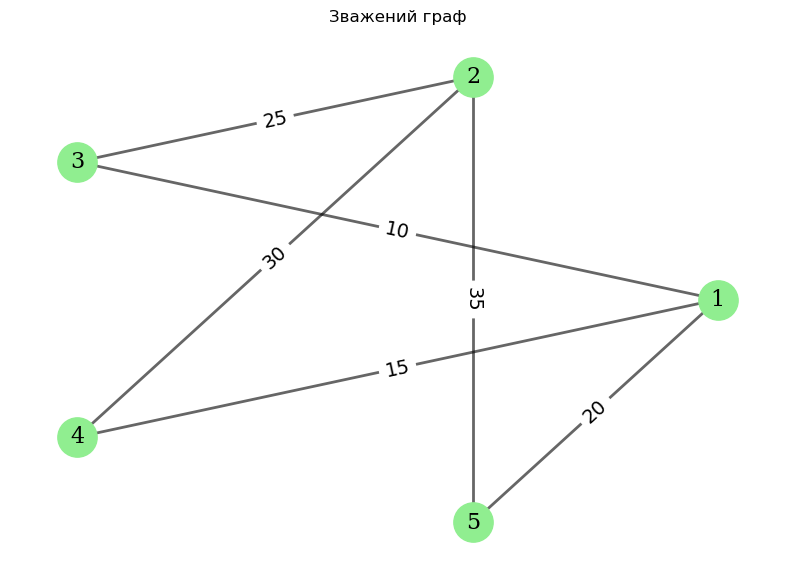

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Створюємо граф
G = nx.Graph()

# Додаємо вершини
G.add_nodes_from([1, 2, 3, 4, 5])

# Додаємо ребра з вагами
edges = [(1,3,10), (1,4,15), (1,5,20), (2,3,25), (2,4,30),(2,5,35)]
G.add_weighted_edges_from(edges)

# Генерація позицій для відображення вершин
pos = nx.circular_layout(G)
# Візуалізація графа
plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightgreen')  # Змінили колір та розмір вузлів
nx.draw_networkx_labels(G, pos, font_size=16, font_family='serif')

# Візуалізація ребер
nx.draw_networkx_edges(G, pos, width=2, edge_color='black', alpha=0.6)  # Зменшили прозорість

# Додавання підписів ваг ребер
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14)

# Показуємо графік
plt.title("Зважений граф")
plt.axis('off') 
plt.show()


Маршрут, знайдений алгоритмом найближчого сусіда: [5, 1, 3, 2, 4, 5]


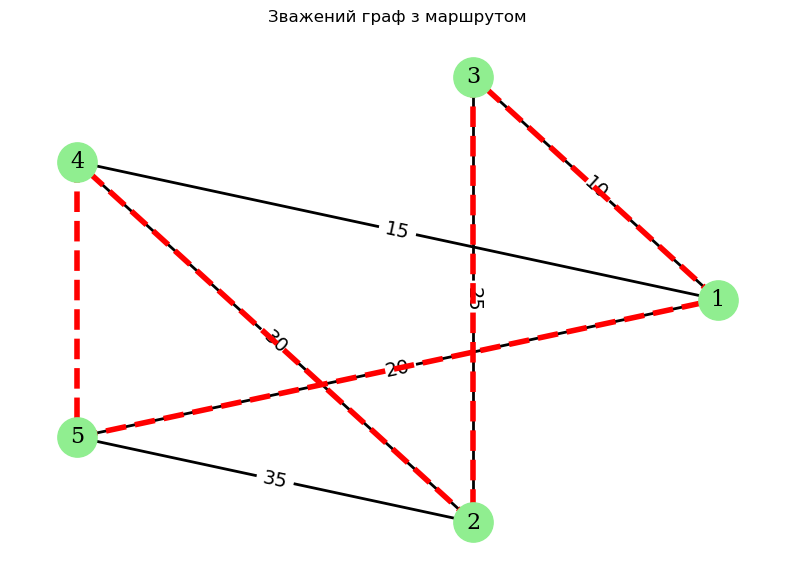

In [21]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Алгоритм найближчого сусіда для графа з модифікаціями
def nearest_neighbor_algorithm_graph(G):
    nodes = list(G.nodes)
    N = len(nodes)
    visited = [False] * N
    tour = []
    
    # Вибираємо довільну точку
    current_node = np.random.choice(nodes)
    tour.append(current_node)
    visited[nodes.index(current_node)] = True
    
    for _ in range(1, N):
        previous_node = current_node
        min_distance = float('inf')
        
        # Шукаємо найближче непосещене сусіднє місто
        for neighbor in G.neighbors(previous_node):
            if not visited[nodes.index(neighbor)]:
                distance = G[previous_node][neighbor]['weight']
                if distance < min_distance:
                    min_distance = distance
                    current_node = neighbor
        
        tour.append(current_node)
        visited[nodes.index(current_node)] = True
    
    # Повертаємось в першу точку
    tour.append(tour[0])
    return tour

# Створення графа з новими значеннями
G = nx.Graph()

# Додавання вершин та ребер
edges = [(1,3,10), (1,4,15), (1,5,20), (2,3,25), (2,4,30),(2,5,35)]
G.add_weighted_edges_from(edges)

# Застосування алгоритму найближчого сусіда
tour = nearest_neighbor_algorithm_graph(G)
print("Маршрут, знайдений алгоритмом найближчого сусіда:", tour)

# Візуалізація графа
# Генеруємо позиції для відображення вершин
pos = nx.circular_layout(G) 

# Візуалізація вузлів
plt.figure(figsize=(10, 7)) 
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightgreen')  # Змінили колір вузлів
nx.draw_networkx_labels(G, pos, font_size=16, font_family='serif')  # Змінили шрифт підписів

# Візуалізація ребер
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='black')  # Змінили колір ребер

# Додавання підписів для ваг ребер
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14)

# Виділяємо маршрут червоним кольором
tour_edges = [(tour[i], tour[i+1]) for i in range(len(tour)-1)]
nx.draw_networkx_edges(G, pos, edgelist=tour_edges, width=4, edge_color='red', style='dashed')  # Змінили стиль ребер

# Показуємо графік
plt.title("Зважений граф з маршрутом")
plt.axis('off')
plt.show()


#### 1. **Груба сила: асимптотична складність $O(n!)$**

Алгоритм грубої сили передбачає перебір усіх можливих перестановок $n$ міст. Для кожної перестановки обчислюється сумарна довжина шляху, і обирається найкоротший.

1. **Кількість перестановок:**  
   Кількість усіх можливих перестановок $n$ міст дорівнює $n!$.

2. **Оцінка часу виконання:**  
   - Для кожної перестановки необхідно обчислити сумарну довжину шляху, що вимагає $O(n)$ операцій (прохід по $n$ містах).
   - Загальний час виконання алгоритму оцінюється як $O(n! \cdot n)$. Проте $n!$ зростає значно швидше, ніж $n$, тому ця частина домінує. Остаточна асимптотика — **$O(n!)$**.

3. **Недоліки:**  
   Через експоненційне зростання $n!$, алгоритм грубої сили є неефективним для великих $n$.

---

#### 2. **Найближчий сусід: асимптотична складність $O(n^2 \cdot \log n)$**

Алгоритм найближчого сусіда працює за жадібним підходом: починаючи з певного міста, він кожного разу вибирає наступне місто, найближче до поточного, поки не буде побудовано цикл.

1. **Побудова матриці відстаней:**  
   - На початку потрібно створити матрицю відстаней між усіма парами міст, що займає $O(n^2)$ операцій.

2. **Жадібний вибір:**  
   - Для кожного міста потрібно знайти найближче місто. Це вимагає пошуку мінімуму серед $n - 1$ можливих відстаней.
   - Якщо використовувати ефективні структури даних (наприклад, збалансовані дерева або черги з пріоритетом), то пошук найближчого міста можна виконати за $O(\log n)$. 
   - Процес повторюється $n$ разів для всіх міст, що дає загальну складність для жадібної частини — $O(n \cdot \log n)$.

3. **Загальна складність:**  
   - Додавання складностей: $O(n^2)$ (побудова матриці) + $O(n \cdot \log n)$ (жадібний вибір для кожного міста).
   - У підсумку отримуємо асимптотичну складність $O(n^2 \cdot \log n)$, де $n^2$ є домінуючим членом у більшості реалізацій.

4. **Переваги:**  
   - Алгоритм працює значно швидше, ніж груба сила.
   - Проте отриманий результат зазвичай не є оптимальним, оскільки алгоритм жадібний і може "застрягати" в локальному мінімумі.

## <center> Контрольні питання </center>

### 1. Що таке жадібний алгоритм?
**Жадібний алгоритм** — це метод, який на кожному кроці вибирає найкраще локальне рішення, сподіваючись, що це призведе до оптимального глобального результату. Він часто використовується для задач, де кожне локальне оптимальне рішення веде до глобального оптимуму, як у задачах мінімального кістякового дерева чи рюкзака. Проте, цей підхід не завжди дає оптимальні результати для всіх задач.


### 2. Які головні принципи роботи жадібних алгоритмів?
**Головні принципи жадібних алгоритмів** — це вибір найкращого локального рішення на кожному кроці та побудова рішення поетапно без повернення до попередніх кроків. Вони часто використовуються в задачах, де локальні оптимуми призводять до глобального оптимуму, але не завжди гарантують оптимальний результат для всіх задач.


### 3. Яка головна відмінність між жадібними алгоритмами та динамічним програмуванням?
Головна відмінність між жадібними алгоритмами та динамічним програмуванням полягає в тому, що жадібні алгоритми приймають локально оптимальні рішення без повернення, тоді як динамічне програмування враховує всі можливі варіанти та використовує рішення підзадач для побудови оптимального глобального результату. Динамічне програмування зазвичай більш складне, але може знаходити оптимальні рішення для більшості задач.

### 4. Наведіть приклади задач, які можна розв’язати за допомогою жадібних алгоритмів.
- Задача про здачу решти (вибір мінімальної кількості монет).
- Алгоритм Крускала для пошуку мінімального кістякового дерева.
- Задача про рюкзак (частковий рюкзак).
- Алгоритм найближчого сусіда для задачі комівояжера.

### 5. Які можуть бути обмеження у використанні жадібних алгоритмів для розв'язання екстремальних задач?
Основне обмеження жадібних алгоритмів полягає в тому, що вони не завжди дають глобально оптимальний результат, оскільки роблять лише локально оптимальні вибори. Це може призвести до неефективних рішень, особливо в задачах, де необхідно враховувати взаємодії між різними частинами рішення, як у задачах без часткових предметів для рюкзака чи задачах комівояжера.

### 6. Чому жадібні алгоритми часто використовуються для наближеного розв’язання екстремальних задач?
Жадібні алгоритми часто використовуються для наближеного розв’язання екстремальних задач, оскільки вони прості у реалізації та забезпечують швидке отримання рішення, навіть якщо воно не є оптимальним. Вони ефективно працюють у задачах, де локально оптимальні рішення наближаються до глобального, забезпечуючи хорошу приближеність у багатьох випадках.